### 📚 What is Pydantic?

•	🔍 Pydantic is a popular data validation library in Python.

•	🧱 It allows you to define schemas using a class that inherits from BaseModel

•	⚠️ When you create a class using BaseModel, it will enforce the data types at runtime

•	🧪 This is better than TypedDict or dataclass, which don’t give runtime errors.


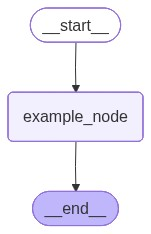

In [12]:
# 🔹 1. Import Required Libraries
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

from pydantic import BaseModel, StrictStr
# •	✅ StateGraph, START, END are from LangGraph.
# •	✅ BaseModel is from Pydantic – it helps in runtime validation.

# 🔹 2. Create the State Schema with Pydantic
class State(BaseModel):
    name: StrictStr
# •	✅ This class defines our input state.
# •	✅ It says that name must be a string.
# •	🛑 If we pass anything else (like int), Pydantic will throw an error at runtime.

# 🔹 3. Define a Node Function
def example_node(state: State):
    return {"message": f"Hello {state.name}"}
# •	🧠 This is a simple node that:
# o	Takes the state
# o	Accesses state.name
# o	Returns a greeting message

# 🔹 4. Build the LangGraph
builder = StateGraph(State)
builder.add_node("example_node", example_node)
builder.add_edge(START, "example_node")
builder.add_edge("example_node", END)
graph = builder.compile()
# •	✅ We initialize the graph with our Pydantic state
# •	✅ Add one node: "example_node"
# •	🔁 Connect:
# o	START ➡️ example_node
# o	example_node ➡️ END

display(Image(graph.get_graph().draw_mermaid_png()))





In [17]:
# 🔹 5. Invoke the Graph with Correct Input ✅
# output = graph.invoke({"name": "Apoorv"})
# print(output)
# {'name': 'Apoorv'}


# •	✅ Input name = "Apoorv" is a string, so the graph runs fine.
# •	💬 Output will be:
# •	{'message': 'Hello Apoorv'}

# 🔹 6. Invoke with Invalid Input ❌
from pydantic import ValidationError

try:
    # ✅ Force validation before invoking graph
    validated_state = State.parse_obj({"name": 123})
    output = graph.invoke(validated_state)
    print(output)
except ValidationError as e:
    print("❌ Validation Error:")
    print(e)

# •	❌ Now we give an integer instead of a string.
# •	❗ Because we’re using Pydantic, it will raise a runtime error like:
# ValidationError: 1 validation error for State
# name
#   str type expected (type=type_error.str)
# •	✅ This is the power of Pydantic – catching errors early!


❌ Validation Error:
1 validation error for State
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type


C:\Users\sahus\AppData\Local\Temp\ipykernel_17484\1461785544.py:16: PydanticDeprecatedSince20: The `parse_obj` method is deprecated; use `model_validate` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  validated_state = State.parse_obj({"name": 123})
